In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In most advanced economies credit is one of the most important things for people. Because it is the most efficient why for financial institutions to keep track of a person's trustworthiness and use it as one of the most important factors to consider when it comes to the decisions of loan or credit card applications.

Since there are so broad applications and important social influences, I immediately decided my topic for this assignment when I found the dataset on kaggle. This project aims to study whether an applicants credit record could be predicted based on their demographic information and therefore help banks to decide possiblity of loan or credit card payment default for applicants.



## Data Preparation

In [2]:
#load data
application_df = pd.read_csv('/Users/songderi/Desktop/credit card/ml data/application_record.csv')
cred_df = pd.read_csv('/Users/songderi/Desktop/credit card/ml data/credit_record.csv')

In [3]:
#get a brief look on the dataset
application_df.head()
cred_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


The first thing to do is to load the dataset into the working environment. The original package is composed of two datasets: application records and credit records. Both of the datasets label the applicants by their user ID. 

The first dataset is composed of 17 coloumns of demographic information about the applicants.

The second dataset on the contrary only contains 3 columns: ID, month_balance, and status. 

In [4]:
#check data type and counts of non-null values

application_df.info()
cred_df.info()

#check counts of unique ID rows
len(set(application_df['ID']))
len(set(cred_df['ID']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

438510

45985

Both of these datasets are not very hard to work with. There is only one column in the first dataset have some null values.

Seconly, we can see that although the credit records dataset has over million rows of record, it only contains the credit record of around 46k applicants. Obviously, for some applicants there are multiple records in the system.

In [5]:
#count the different values in the STATUS column

cred_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [6]:
#converting STATUS column with only 2 values: Good, Bad

cred_df.replace({'C':'Good', 'X':'Good', '0':'Bad','1':'Bad','2':'Bad','3':'Bad','4':'Bad','5':'Bad'}, inplace=True)
cred_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good
1,5001711,-1,Bad
2,5001711,-2,Bad
3,5001711,-3,Bad
4,5001712,0,Good
...,...,...,...
1048570,5150487,-25,Good
1048571,5150487,-26,Good
1048572,5150487,-27,Good
1048573,5150487,-28,Good


In [7]:
#dropping row whose MONTHS_BALANCE is less than 0

cred_df=cred_df[cred_df['MONTHS_BALANCE']<0]
cred_df

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,Bad
2,5001711,-2,Bad
3,5001711,-3,Bad
5,5001712,-1,Good
6,5001712,-2,Good
...,...,...,...
1048570,5150487,-25,Good
1048571,5150487,-26,Good
1048572,5150487,-27,Good
1048573,5150487,-28,Good


Status in the original dataset has 8 different values: C, X and 0-5. C means the loan for the month has been paid off, X means there are no loans for that months, 0 means the payment is overdue between 0-29 days, 1 means the payment is overdue between 30-59 days, 3:60-89 days, 4:90-119 days, 5:above 120 days (basically bad debts).

To make the analysis easier, C and X has been considered good credit records, and 0-5 have beenn considered as bad credit records. 

Besides, the records whose month balance is 0 has been dropped because it is still within the issuance month of loan and no credit record has been recorded.

In [8]:
#converting Status into Binary variable of 1 and 0

result_df = cred_df.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0).reset_index()
result_df.loc[(result_df['Good'] / result_df['Bad'] >= 1), 'Status'] = 1
result_df.loc[(result_df['Good'] / result_df['Bad'] < 1 ), 'Status'] = 0

#merging 2 datasets into one and named it whole_data

whole_data = application_df.merge(result_df, on='ID', how='inner')
whole_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad,Good,Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,2,13,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,2,12,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,7,22,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,1,3,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36137,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,3,8,1.0
36138,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,19,4,0.0
36139,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,19,13,0.0
36140,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,9,0,0.0


In [9]:
#calculating the rate of good and bad credit records for each customer

whole_data['Rate']=(whole_data['Good']+1)/(whole_data['Bad']+1)
whole_data['Rate']=whole_data['Rate'].round(2)

whole_data.head()  

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad,Good,Status,Rate
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,2,13,1.0,4.67
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,2,12,1.0,4.33
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,7,22,1.0,2.88
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,1,3,1.0,2.00
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,0,5,1.0,6.00


Three things have been done in the above two codes. 

Firstly the status record have been converted into binary numerical values: 1: good, 0: bad. 

Secondly, 2 datasets have been merged into one dataset and I called it whole_data. I used inner join by ID because we are only able to run our prediction for applicant who has both the demographic and credit information in the dataset. 

Thirdly, I created a column called Rate which is the calculated by the number good credit records over the number of bad credit records. The calculation is quite intuitive, 1 is the threshold between more good credit records or more bad credit records. The bigger the rate the better an applicant's credit history.

In [10]:
#check null inputs

whole_data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11228
CNT_FAM_MEMBERS            0
Bad                        0
Good                       0
Status                     0
Rate                       0
dtype: int64

In [11]:
#drop rows with null values

whole_data.dropna(inplace=True)
whole_data.isnull().sum()
whole_data.count()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Bad                    0
Good                   0
Status                 0
Rate                   0
dtype: int64

ID                     24914
CODE_GENDER            24914
FLAG_OWN_CAR           24914
FLAG_OWN_REALTY        24914
CNT_CHILDREN           24914
AMT_INCOME_TOTAL       24914
NAME_INCOME_TYPE       24914
NAME_EDUCATION_TYPE    24914
NAME_FAMILY_STATUS     24914
NAME_HOUSING_TYPE      24914
DAYS_BIRTH             24914
DAYS_EMPLOYED          24914
FLAG_MOBIL             24914
FLAG_WORK_PHONE        24914
FLAG_PHONE             24914
FLAG_EMAIL             24914
OCCUPATION_TYPE        24914
CNT_FAM_MEMBERS        24914
Bad                    24914
Good                   24914
Status                 24914
Rate                   24914
dtype: int64

The only columnns that has null value is occupation type as mentioned. Since it is a textual and categorical data, there are no ideal ways to fill the null value but to drop all of them. We ended up a dataset with around 25k rows which is not a lot from a machine learning perspective.

In [12]:
#rename columns

whole_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Realty',
                         'CNT_CHILDREN':'ChildNo','AMT_INCOME_TOTAL':'Income',
                         'NAME_EDUCATION_TYPE':'Edu_Level','NAME_FAMILY_STATUS':'Family_Type',
                        'NAME_HOUSING_TYPE':'Housing_Type','FLAG_EMAIL':'Email',
                         'NAME_INCOME_TYPE':'Income_Type','FLAG_WORK_PHONE':'Work_Phone',
                         'FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'Fam_Size',
                        'OCCUPATION_TYPE':'Occupation'
                        },inplace=True)

In [13]:
#drop 'FLAG_MOBIL' since it is similar to phone

whole_data.drop(columns='FLAG_MOBIL', inplace = True)
print(whole_data.columns)

Index(['ID', 'Gender', 'Car', 'Realty', 'ChildNo', 'Income', 'Income_Type',
       'Edu_Level', 'Family_Type', 'Housing_Type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Work_Phone', 'Phone', 'Email', 'Occupation',
       'Fam_Size', 'Bad', 'Good', 'Status', 'Rate'],
      dtype='object')


Names in the orginial dataset are the quite troublesome, for example, why would you have 'CODE_GENDER','FLAG_OWN_CAR'?  The 'CODE','FLAG' are meaningless which is why I converted the column name into a more intuitive way and you will know straight away what the column is about.

In [14]:
#convert age and experience from days to years and rename them

whole_data['DAYS_BIRTH'] = (whole_data['DAYS_BIRTH']*(-1)/365).round()
whole_data['DAYS_EMPLOYED'] = (whole_data['DAYS_EMPLOYED']*(-1)/365).round()
whole_data = whole_data.rename({'DAYS_BIRTH':'Age','DAYS_EMPLOYED':'Yrs_Experience'}, axis=1)

In [15]:
#check the values in Age and Year of Experience

whole_data['Age'] 
whole_data['Yrs_Experience']
print(whole_data.columns)

2        59.0
3        52.0
4        52.0
5        52.0
6        52.0
         ... 
36137    48.0
36138    34.0
36139    34.0
36140    49.0
36141    25.0
Name: Age, Length: 24914, dtype: float64

2        3.0
3        8.0
4        8.0
5        8.0
6        8.0
        ... 
36137    7.0
36138    4.0
36139    4.0
36140    2.0
36141    3.0
Name: Yrs_Experience, Length: 24914, dtype: float64

Index(['ID', 'Gender', 'Car', 'Realty', 'ChildNo', 'Income', 'Income_Type',
       'Edu_Level', 'Family_Type', 'Housing_Type', 'Age', 'Yrs_Experience',
       'Work_Phone', 'Phone', 'Email', 'Occupation', 'Fam_Size', 'Bad', 'Good',
       'Status', 'Rate'],
      dtype='object')


The last step before we dive into EDA and a scrunitization of the applicants' different features is to convert the ages and years of experience columns. In the orginial dataset, the values for both of these columns are expressed in days as well as using a negative number which is again very hard to undestand and counterintuitive. Both of the columns have been changed into years as the unit. 

## Examine the Data By Column and EDA

### Gender

<AxesSubplot:ylabel='Gender'>

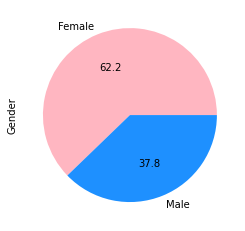

In [16]:
#pie chart for gender distribution

whole_data.groupby('Gender')['Gender'].count().plot(kind='pie', 
                                                    labels=['Female','Male'],
                                                    autopct='%.1f', 
                                                    colors=['lightpink','dodgerblue'])

In [17]:
#convert Gender column into binary inputs

whole_data.Gender = whole_data.Gender.replace(['F','M'],[0,1])

In [18]:
#count good, bad credit record by gender

male_df = whole_data[whole_data['Gender'] == 1] 
female_df = whole_data[whole_data['Gender'] == 0] 
male_df.Status.value_counts()
female_df.Status.value_counts()

1.0    5179
0.0    4233
Name: Status, dtype: int64

1.0    8527
0.0    6975
Name: Status, dtype: int64

In [19]:
#prepare for the stack bar chart

gender = ['Male', 'Female']
good_credit = np.array([5179,8527])
bad_credit = np.array([4233, 6975])
ind = list(range(2))

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ff36f339250>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Gender')

Text(0.5, 1.0, 'Credit Status By Gender')

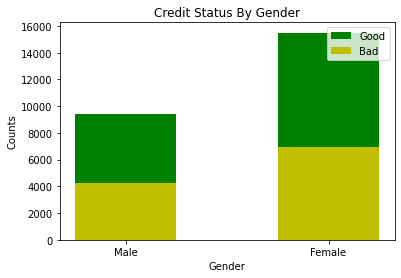

In [20]:
#plot the stack bar chart

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, gender)
plt.ylabel("Counts")
plt.xlabel("Gender")
plt.legend(loc="upper right")
plt.title("Credit Status By Gender")

In [21]:
#calculate the percentage to get a more precise number

print('The percentage of good status in Male users is '+str(round(((5179/(5179+4233))*100),2))+'%' )
print('The percentage of good status in Female users is '+str(round(((8527/(8527+6975))*100),2))+'%' )

The percentage of good status in Male users is 55.03%
The percentage of good status in Female users is 55.01%


We can tell from the pie chart, we have more female customers than male customers by a lot which is somewhat surprising. Since the dataset is about credit card approval, one conclusion a bank could draw is that credit cards are in general more attractive to female than males. Maybe it is because female normally have more shopping needs such as cosmetics which men would not need. However this is purely speculation, and since the topic of the analysis is not to measure why we have more female than male users I will not elaborate. However, for banks, since we have know that there are more female in our customer base, we could bias toward female in the future when it comes to what kind of data and features should be collected.

Secondly, I did a stakced bar chart to understand whether there is a difference between male and female customers for the proportions of good credits and bad credits. We can tell from chart and the calculation the answer is no,  both genders have basically the same distribution for customers with good and bad credits.

### Own Car

<AxesSubplot:title={'center':'Car Ownership'}, ylabel='Car'>

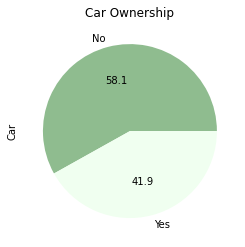

In [22]:
#pie chart for car ownership distribution

whole_data.groupby('Car')['Car'].count().plot(kind='pie', 
                                                    labels=['No','Yes'],
                                                    autopct='%.1f', 
                                                    title='Car Ownership',
                                                    colors=['darkseagreen','honeydew'])

In [23]:
#convert Car Ownership column into binary inputs

whole_data.Car = whole_data.Car.replace(['N','Y'],[0,1])

In [24]:
#count good, bad credit record by Car Ownership

Car_df = whole_data[whole_data['Car'] == 1] 
No_Car_df = whole_data[whole_data['Car'] == 0] 
Car_df.Status.value_counts()
No_Car_df.Status.value_counts()

1.0    5825
0.0    4612
Name: Status, dtype: int64

1.0    7881
0.0    6596
Name: Status, dtype: int64

In [25]:
#prepare for the stack bar chart

car = ['Own Car', 'No Car']
good_credit = np.array([5825,7881])
bad_credit = np.array([4612, 6596])
ind = list(range(2))

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ff371f52430>,
 [Text(0, 0, 'Own Car'), Text(1, 0, 'No Car')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Car Ownership')

Text(0.5, 1.0, 'Credit Status By Car Owndership')

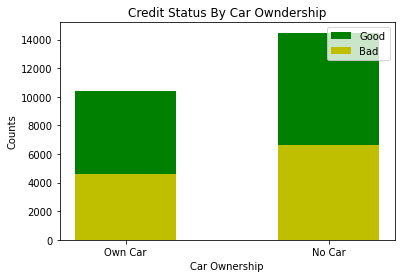

In [26]:
#plot the stack bar chart

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, car)
plt.ylabel("Counts")
plt.xlabel("Car Ownership")
plt.legend(loc="upper right")
plt.title("Credit Status By Car Owndership")

In [27]:
#calculate the percentage to get a more precise number

print('The percentage of good status in Male users is '+str(round(((5825/(5825+4612))*100),2))+'%' )
print('The percentage of good status in Female users is '+str(round(((7881/(7881+6596))*100),2))+'%' )

The percentage of good status in Male users is 55.81%
The percentage of good status in Female users is 54.44%


### Own Realty

<AxesSubplot:title={'center':'Realty Ownership'}, ylabel='Realty'>

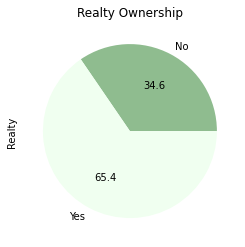

In [28]:
#pie chart for Realty ownership distribution

whole_data.groupby('Realty')['Realty'].count().plot(kind='pie', 
                                                    labels=['No','Yes'],
                                                    autopct='%.1f', 
                                                    title='Realty Ownership',
                                                    colors=['darkseagreen','honeydew'])

In [29]:
#convert Realty Ownership column into binary inputs

whole_data.Realty = whole_data.Realty.replace(['N','Y'],[0,1])

In [30]:
#count good, bad credit record by Realty Ownership

Realty_df = whole_data[whole_data['Realty'] == 1] 
No_Real_df = whole_data[whole_data['Realty'] == 0] 
Realty_df.Status.value_counts()
No_Real_df.Status.value_counts()

1.0    8892
0.0    7413
Name: Status, dtype: int64

1.0    4814
0.0    3795
Name: Status, dtype: int64

In [31]:
#prepare for the stack bar chart

realty = ['Own Realty', 'No Realty']
good_credit = np.array([8892,4814])
bad_credit = np.array([7413, 3795])
ind = list(range(2))

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ff3787225b0>,
 [Text(0, 0, 'Own Realty'), Text(1, 0, 'No Realty')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Realty Ownership')

Text(0.5, 1.0, 'Credit Status By Realty Ownership')

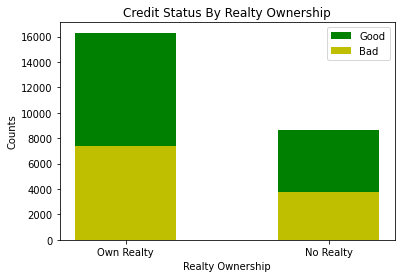

In [32]:
#plot the stack bar chart

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, realty)
plt.ylabel("Counts")
plt.xlabel("Realty Ownership")
plt.legend(loc="upper right")
plt.title("Credit Status By Realty Ownership")

In [33]:
#calculate the percentage to get a more precise number

print('The percentage of good status in Male users is '+str(round(((8892/(8892+7413))*100),2))+'%' )
print('The percentage of good status in Female users is '+str(round(((4814/(4814+3795))*100),2))+'%' )

The percentage of good status in Male users is 54.54%
The percentage of good status in Female users is 55.92%


I would like to interpret the ownership of automobiles and ownership of properties together since both of them are a big purchase for general population. We can tell from 2 pie charts that 65% of the customers owns a real estate property while only around 42% of the same population owns an automobile. It could be an indicator of people values home more than car. I am not sure from which country the dataset is from but in most developed western countries(except the US) and leading emerging economies in eastern Asia, public transportation within cities is well developed that the need for a car is not that urgent, plus traffic is getting worse everywhere in the world. However, no matter where you live you would always need somewhere to stay.

Again, the stacked bar chart to study whether population who own car/realty has a different proportion of good credit customers than those who don't own them is less informative. They are quite evenly distributed for both features. 

### Number of Children and Family Size

In [34]:
#see the correlation of count of child and count of family member

whole_data['ChildNo'].corr(whole_data['Fam_Size'])

0.902281749549604

In [35]:
#drop no. of child and check the remaining columns in the dataset

whole_data.drop(columns='ChildNo', inplace = True)
whole_data.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'Income', 'Income_Type', 'Edu_Level',
       'Family_Type', 'Housing_Type', 'Age', 'Yrs_Experience', 'Work_Phone',
       'Phone', 'Email', 'Occupation', 'Fam_Size', 'Bad', 'Good', 'Status',
       'Rate'],
      dtype='object')

For the columns: number of children and number family members, I checked how correlated they are. They are correlated with one another with a correlation above 90% just as I anticipated. Therefore I decided to drop the number of children feature and only keep family size feature for the analysis.

### Housing Type

In [36]:
#count each values in the housing type column

whole_data.Housing_Type.value_counts()

House / apartment      21920
With parents            1405
Municipal apartment      808
Rented apartment         431
Office apartment         199
Co-op apartment          151
Name: Housing_Type, dtype: int64

([<matplotlib.axis.XTick at 0x7ff37878f880>,
 [Text(1, 0, 'House'),
  Text(2, 0, 'W_Par'),
  Text(3, 0, 'Mun_Apt'),
  Text(4, 0, 'Rent_Apt'),
  Text(5, 0, 'Ofc_Apt'),
  Text(6, 0, 'Coop_Apt')])

Text(0.5, 0, 'Types')

Text(0, 0.5, 'Number Of User')

Text(0.5, 1.0, 'Housing Types Background')

<BarContainer object of 6 artists>

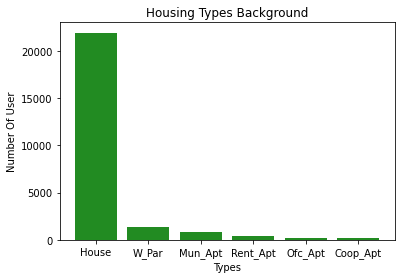

In [37]:
#plot bar chart for housing type column by type

x = ['House', 'W_Par', 'Mun_Apt', 'Rent_Apt','Ofc_Apt','Coop_Apt']
y = [21920,1405,808,431,199,151]
x_pos = [1, 2, 3, 4, 5,6]
plt.xticks(x_pos, x)
plt.xlabel('Types')
plt.ylabel('Number Of User')
plt.title('Housing Types Background')
plt.bar(x_pos, y, color ='forestgreen')

In [38]:
#dropping housing type column from dataset

whole_data.drop(columns='Housing_Type', inplace = True)
whole_data.columns
whole_data.head()

Index(['ID', 'Gender', 'Car', 'Realty', 'Income', 'Income_Type', 'Edu_Level',
       'Family_Type', 'Age', 'Yrs_Experience', 'Work_Phone', 'Phone', 'Email',
       'Occupation', 'Fam_Size', 'Bad', 'Good', 'Status', 'Rate'],
      dtype='object')

,ID,Gender,Car,Realty,Income,Income_Type,Edu_Level,Family_Type,Age,Yrs_Experience,Work_Phone,Phone,Email,Occupation,Fam_Size,Bad,Good,Status,Rate
2,5008806,1,1,1,112500.0,Working,Secondary / secondary special,Married,59.0,3.0,0,0,0,Security staff,2.0,7,22,1.0,2.88
3,5008808,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52.0,8.0,0,1,1,Sales staff,1.0,1,3,1.0,2.00
4,5008809,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52.0,8.0,0,1,1,Sales staff,1.0,0,5,1.0,6.00
5,5008810,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52.0,8.0,0,1,1,Sales staff,1.0,6,20,1.0,3.00
6,5008811,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,52.0,8.0,0,1,1,Sales staff,1.0,6,32,1.0,4.71


I wanted to understand the distribution of different values for the housing type column. After doing a value counts and a bar chart it is obvious that the great majority (almost 90%) of the customers in the dataset fall in category of housing. The other 5 types combined only consist around 10%. I figured it will not be useful for the analysis since the data is heavily concentrated in one type of housing and therefore dropped this column of information.

### Income

In [39]:
#check the max and min value for income

whole_data.Income.max()
whole_data.Income.min()

1575000.0

27000.0

<AxesSubplot:xlabel='Income', ylabel='Count'>

Text(0.5, 1.0, 'Income distribution')

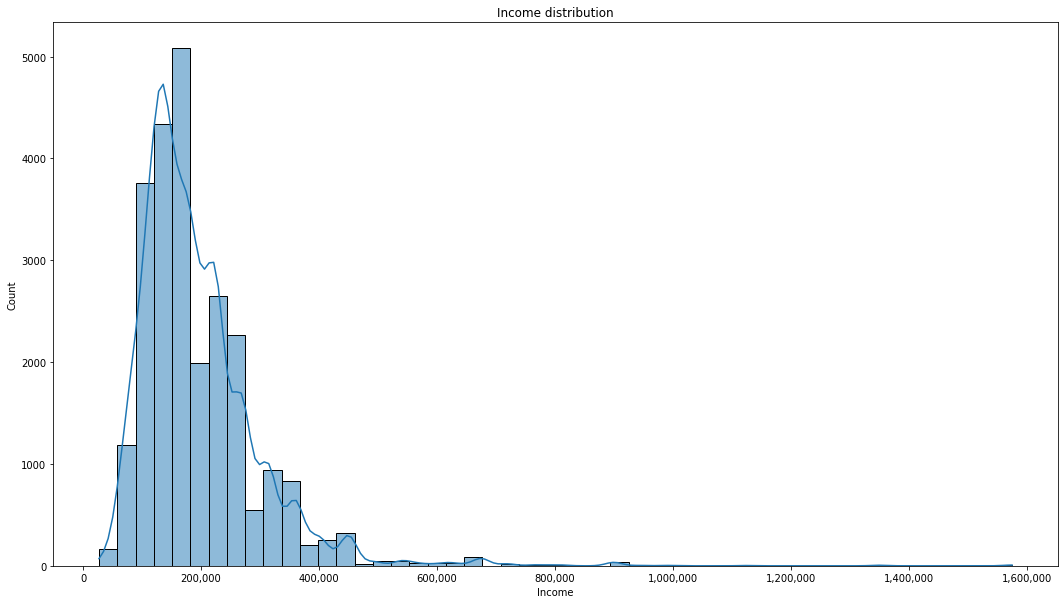

In [40]:
#plot histogram for income distrbution

fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(whole_data['Income'],bins=50,kde=True)
ax.get_xaxis().set_major_formatter(
plot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('{} distribution'.format('Income'))
plt.show()

In [41]:
#count rows with income above 800k

whole_data[whole_data['Income']>800000].count()

ID                71
Gender            71
Car               71
Realty            71
Income            71
Income_Type       71
Edu_Level         71
Family_Type       71
Age               71
Yrs_Experience    71
Work_Phone        71
Phone             71
Email             71
Occupation        71
Fam_Size          71
Bad               71
Good              71
Status            71
Rate              71
dtype: int64

In [42]:
#drop rows with income above 800k

whole_data= whole_data[whole_data['Income'] <= 800000]
whole_data.Income.max()
whole_data.Income.min()

787500.0

27000.0

The annual income is mostly concentrated in the range of 50k to 400k. Since there are only 71 entries that have income more than 800k, they will be treated as outliers and got dropped from the dataset.

For the distribution of the income, although somewhat skewed but still demonstrates a general shape of normal distribution which is good for the analysis.


### Age and Years of Experiance

<AxesSubplot:xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age distribution')

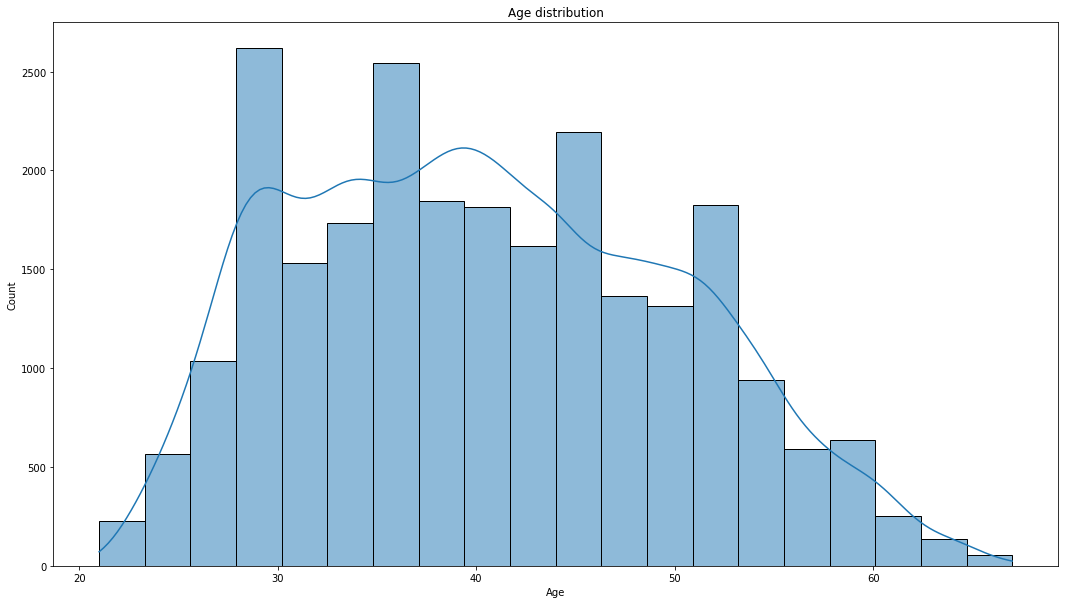

In [43]:
#plot histogram for age distrbution

fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(whole_data['Age'],bins=20,kde=True)
ax.get_xaxis().set_major_formatter(
plot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('{} distribution'.format('Age'))
plt.show()

In [44]:
#check the max and min value for age

whole_data.Age.max()
whole_data.Age.min()

67.0

21.0

The distribution of the ages in the dataset also looks good, with a somewhat skewed normal distribution.

There are four bars that stick out from the distribution: late 20s, mid 30s, mid 40s and early 50s. Knowing this information might not tell a lot for the purpose of this analysis, but if this was to presented to bank's management it would be something useful to keep in mind if they are going to promote credit cards.

<AxesSubplot:xlabel='Yrs_Experience', ylabel='Count'>

Text(0.5, 1.0, 'Yrs_Experience distribution')

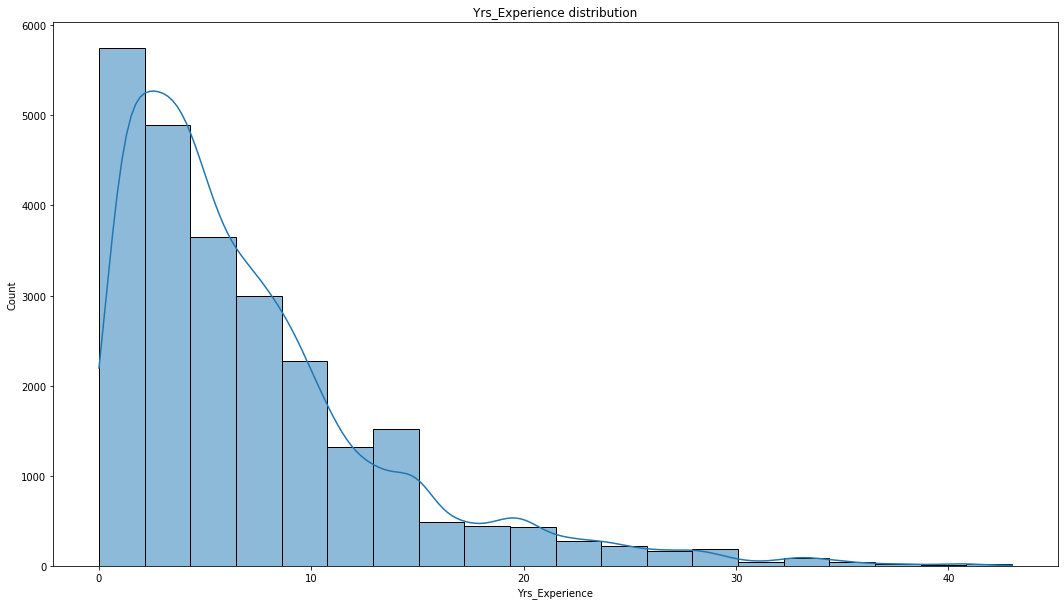

In [45]:
#plot histogram for age distrbution

fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(whole_data['Yrs_Experience'],bins=20,kde=True)
ax.get_xaxis().set_major_formatter(
plot.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('{} distribution'.format('Yrs_Experience'))
plt.show()

In [46]:
#check the max and min value for years of experience

whole_data.Yrs_Experience.max()
whole_data.Yrs_Experience.min()

43.0

0.0

From the distribution we understand that the lower the working experience the more likely that a person is going to need credit card. For banks, this is a very important piece of information. Since we would generally assume people with less expeirence earns less and thus weaker paying ability for debts, thus higher default probability. So banks have to be extra careful when deciding whether to issue the card or the amount of allowance for the card.  


## Categorical Data (Income Type, Occupation, Education Level, Family Type)

###  Regrouping Categorical Data

In [47]:
#check unique values in categorical columns

whole_data.Income_Type.unique()
whole_data.Edu_Level.unique()
whole_data.Family_Type.unique()
whole_data.Occupation.unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

array(['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Cooking staff', 'Low-skill Laborers',
       'Medicine staff', 'Private service staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [48]:
#regroup the values in education level column

whole_data.Edu_Level = whole_data.Edu_Level.replace(['Secondary / secondary special','Lower secondary','Academic degree'],
                                                     ['Secondary and Lower','Secondary and Lower','Higher education'])
whole_data.Edu_Level.unique()


array(['Secondary and Lower', 'Higher education', 'Incomplete higher'],
      dtype=object)

In [49]:
#regroup the values in family type column

whole_data.Family_Type = whole_data.Family_Type.replace(['Civil marriage','Single / not married','Separated'],
                                                        ['Married','Single or Seperated','Single or Seperated'])
whole_data.Family_Type.unique()

array(['Married', 'Single or Seperated', 'Widow'], dtype=object)

In [50]:
#regroup the values in occupation type column

whole_data.loc[(whole_data['Occupation']=='Cleaning staff') | (whole_data['Occupation']=='Cooking staff') | (whole_data['Occupation']=='Drivers') | (whole_data['Occupation']=='Laborers') | (whole_data['Occupation']=='Low-skill Laborers') | (whole_data['Occupation']=='Security staff') | (whole_data['Occupation']=='Waiters/barmen staff'),'Occupation']='Labor_Work'
whole_data.loc[(whole_data['Occupation']=='Accountants') | (whole_data['Occupation']=='Core staff') | (whole_data['Occupation']=='HR staff') | (whole_data['Occupation']=='Medicine staff') | (whole_data['Occupation']=='Private service staff') | (whole_data['Occupation']=='Realty agents') | (whole_data['Occupation']=='Sales staff') | (whole_data['Occupation']=='Secretaries'),'Occupation']='Office_Work'
whole_data.loc[(whole_data['Occupation']=='Managers') | (whole_data['Occupation']=='High skill tech staff') | (whole_data['Occupation']=='IT staff'),'Occupation']='High_Skill_Work'
whole_data.Occupation.unique()

array(['Labor_Work', 'Office_Work', 'High_Skill_Work'], dtype=object)

In [51]:
#check the value counts

whole_data.Income_Type.value_counts()
whole_data.Edu_Level.value_counts()
whole_data.Family_Type.value_counts()
whole_data.Occupation.value_counts()

Working                 15460
Commercial associate     6956
State servant            2404
Pensioner                  13
Student                    10
Name: Income_Type, dtype: int64

Secondary and Lower    16820
Higher education        7043
Incomplete higher        980
Name: Edu_Level, dtype: int64

Married                19423
Single or Seperated     4844
Widow                    576
Name: Family_Type, dtype: int64

Labor_Work         10382
Office_Work        10084
High_Skill_Work     4377
Name: Occupation, dtype: int64

In [53]:
#regroup the values in income type column

whole_data.loc[(whole_data['Income_Type']=='Pensioner')|(whole_data['Income_Type']=='Student')|(whole_data['Income_Type']=='State servant'),'Income_Type'] = 'State Servant and Non-Labor Force'
whole_data.Income_Type.value_counts()

'''
at first, income type was going to be left unchanged but after realizing both students and pensioner 
have only 10,13 counts, I decided to put them into the same group with state servant
'''

Working                              15460
Commercial associate                  6956
State Servant and Non-Labor Force     2427
Name: Income_Type, dtype: int64

'\nat first, income type was going to be left unchanged but after realizing both students and pensioner \nhave only 10,13 counts, I decided to put them into the same group with state servant\n'

There are 4 major categorical data: Income type, Family type, Occupation and Education level. In order to make the analysis easier the values within each category have been regrouped into 3 major types for all 4 categorical values.

### Income Type

In [54]:
#count number of good status by income type

Working_df = whole_data.loc[(whole_data['Income_Type']== 'Working') & (whole_data['Status']==1.0)] 
ComAssociate_df = whole_data.loc[(whole_data['Income_Type']== 'Commercial associate') & (whole_data['Status']==1.0)] 
SS_NLF_df = whole_data.loc[(whole_data['Income_Type']== 'State Servant and Non-Labor Force') & (whole_data['Status']==1.0)] 

len(Working_df)
len(ComAssociate_df)
len(SS_NLF_df)

8542

3764

1371

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7ff379af0e50>,
 [Text(0, 0, 'Working'), Text(1, 0, 'Associate'), Text(2, 0, 'SS_NLF')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Income Type')

Text(0.5, 1.0, 'Credit Status By Income Type')

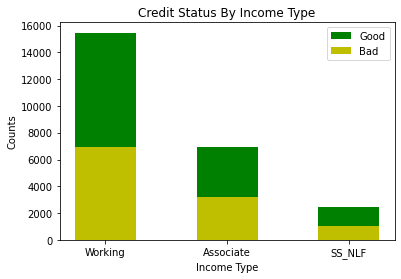

In [55]:
#plot stacked bar chart to see proportion good status by income type

work_type = ['Working', 'Associate', 'SS_NLF']
good_credit = np.array([8542, 3764, 1371])
bad_credit = np.array([6918, 3192 , 1056])
ind = list(range(3))

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, work_type)
plt.ylabel("Counts")
plt.xlabel("Income Type")
plt.legend(loc="upper right")
plt.title("Credit Status By Income Type")

In [56]:
#calculate precise percantage

print('The percentage of good status in working users is '+str(round(((8542/15460)*100),2))+'%' )
print('The percentage of good status in commercial associate users is '+str(round(((3764/6956)*100),2))+'%' )
print('The percentage of good status in state servant and non-labour force users is '+str(round(((1371/2427)*100),2))+'%' )

The percentage of good status in working users is 55.25%
The percentage of good status in commercial associate users is 54.11%
The percentage of good status in state servant and non-labour force users is 56.49%


<AxesSubplot:ylabel='Income_Type'>

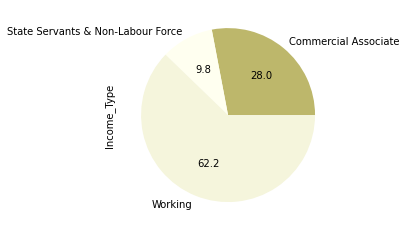

In [57]:
#plot the pie chart for income type

whole_data.groupby('Income_Type')['Income_Type'].count().plot(kind='pie', 
                                                    labels=['Commercial Associate','State Servants & Non-Labour Force','Working'],
                                                    autopct='%.1f', 
                                                    title='',
                                                    colors=['darkkhaki','ivory','beige'])

The classification of income type is quite vague from the original dataset which is why I think there are not much of a valuable information.

### Education Level

In [58]:
#count number of good status by Education Level

SL_df = whole_data.loc[(whole_data['Edu_Level']== 'Secondary and Lower') & (whole_data['Status']==1.0)] 
Highedu_df = whole_data.loc[(whole_data['Edu_Level']== 'Higher education') & (whole_data['Status']==1.0)] 
IncomHigh_df = whole_data.loc[(whole_data['Edu_Level']== 'Incomplete higher') & (whole_data['Status']==1.0)] 

len(SL_df)
len(Highedu_df)
len(IncomHigh_df)

9117

4022

538

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7ff3794b2e20>,
 [Text(0, 0, 'Secondary & Lower'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Imcomplete Higher')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Education Level')

Text(0.5, 1.0, 'Credit Status By Education Level')

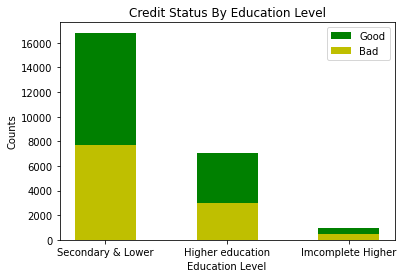

In [59]:
#plot stacked bar chart to see proportion good status by education level

edu_type = ['Secondary & Lower', 'Higher education', 'Imcomplete Higher']
good_credit = np.array([9117,4022,538])
bad_credit = np.array([7703, 3021, 442])
ind = list(range(3))

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, edu_type)
plt.ylabel("Counts")
plt.xlabel("Education Level")
plt.legend(loc="upper right")
plt.title("Credit Status By Education Level")

In [60]:
#calculate precise percantage

print('The percentage of good status in users with secondary and low education is '+str(round(((9117/16820)*100),2))+'%' )
print('The percentage of good status in users with higher education is '+str(round(((4022/7043)*100),2))+'%' )
print('The percentage of good status in users with incomplete higher education is'+str(round(((538/980)*100),2))+'%' )

The percentage of good status in users with secondary and low education is 54.2%
The percentage of good status in users with higher education is 57.11%
The percentage of good status in users with incomplete higher education is54.9%


<AxesSubplot:ylabel='Edu_Level'>

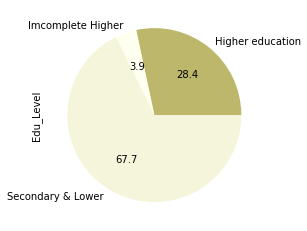

In [61]:
#plot the pie chart for education level

whole_data.groupby('Edu_Level')['Edu_Level'].count().plot(kind='pie', 
                                                    labels=['Higher education','Imcomplete Higher','Secondary & Lower'],
                                                    autopct='%.1f', 
                                                    title='',
                                                    colors=['darkkhaki','ivory','beige'])

### Family Type

In [62]:
#count number of good status by family type

Married_df = whole_data.loc[(whole_data['Family_Type']== 'Married') & (whole_data['Status']==1.0)] 
Single_df = whole_data.loc[(whole_data['Family_Type']== 'Single or Seperated') & (whole_data['Status']==1.0)] 
Wid_df = whole_data.loc[(whole_data['Family_Type']== 'Widow') & (whole_data['Status']==1.0)] 

len(Married_df)
len(Single_df)
len(Wid_df)

10744

2629

304

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7ff37a387430>,
 [Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Widow')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Family Status')

Text(0.5, 1.0, 'Credit Status By Family Status')

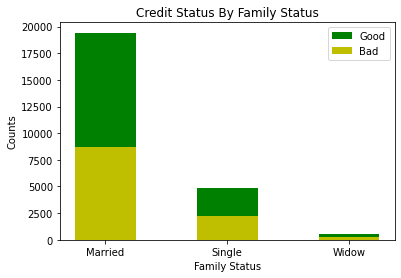

In [63]:
#plot stacked bar chart to see proportion good status by family type

fam_type = ['Married', 'Single', 'Widow']
good_credit = np.array([10744,2629,304])
bad_credit = np.array([8679,2215, 272])
ind = list(range(3))

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, fam_type)
plt.ylabel("Counts")
plt.xlabel("Family Status")
plt.legend(loc="upper right")
plt.title("Credit Status By Family Status")


In [64]:
#calculate precise percantage

print('The percentage of good status in married users is '+str(round(((10744/19423)*100),2))+'%' )
print('The percentage of good status in single users is '+str(round(((2629/4844)*100),2))+'%' )
print('The percentage of good status in widowed users is '+str(round(((304/576)*100),2))+'%' )

The percentage of good status in married users is 55.32%
The percentage of good status in single users is 54.27%
The percentage of good status in widowed users is 52.78%


<AxesSubplot:title={'center':'Family Type'}, ylabel='Family_Type'>

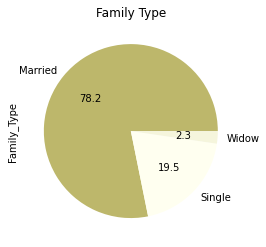

In [65]:
#plot the pie chart for family type

whole_data.groupby('Family_Type')['Family_Type'].count().plot(kind='pie', 
                                                    labels=['Married','Single','Widow'],
                                                    autopct='%.1f', 
                                                    title='Family Type',
                                                    colors=['darkkhaki','ivory','beige'])

### Occupation Type

In [66]:
#count number of good status by occupation type

Working_df = whole_data.loc[(whole_data['Occupation']== 'Labor_Work') & (whole_data['Status']==1.0)] 
ComAssociate_df = whole_data.loc[(whole_data['Occupation']== 'Office_Work') & (whole_data['Status']==1.0)] 
SS_NLF_df = whole_data.loc[(whole_data['Occupation']== 'High_Skill_Work') & (whole_data['Status']==1.0)] 

len(Working_df)
len(ComAssociate_df)
len(SS_NLF_df)

5742

5526

2409

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7ff37a70a250>,
 [Text(0, 0, 'Labor Work'), Text(1, 0, 'Office'), Text(2, 0, 'High Skill')])

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Occupation Type')

Text(0.5, 1.0, 'Credit Status By Occupation Type')

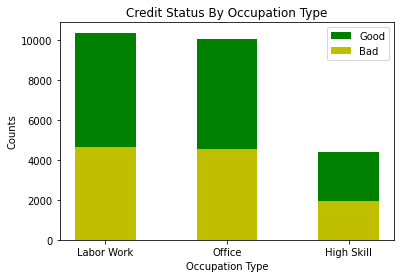

In [67]:
#plot stacked bar chart to see proportion good status by occupation type

occup_type = ['Labor Work', 'Office', 'High Skill']
good_credit = np.array([5742,5526 , 2409])
bad_credit = np.array([4640 ,4558 , 1968])
ind = list(range(3))

plt.bar(ind, good_credit, width=0.5, label='Good', color='g', bottom=bad_credit)
plt.bar(ind, bad_credit, width=0.5, label='Bad', color='y')

plt.xticks(ind, occup_type)
plt.ylabel("Counts")
plt.xlabel("Occupation Type")
plt.legend(loc="upper right")
plt.title("Credit Status By Occupation Type")



In [68]:
#calculate precise percantage

print('The percentage of good status in labor work users is '+str(round(((5742/10382)*100),2))+'%' )
print('The percentage of good status in office work users is '+str(round(((5526/10084)*100),2))+'%' )
print('The percentage of good status in high skill work users is '+str(round(((2409/4377)*100),2))+'%' )

The percentage of good status in labor work users is 55.31%
The percentage of good status in office work users is 54.8%
The percentage of good status in high skill work users is 55.04%


<AxesSubplot:title={'center':'Occupation Type'}, ylabel='Occupation'>

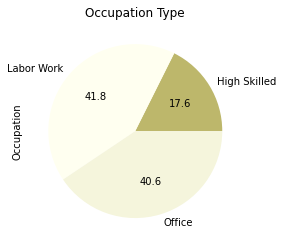

In [69]:
#plot the pie chart for occupation type

whole_data.groupby('Occupation')['Occupation'].count().plot(kind='pie', 
                                                    labels=['High Skilled','Labor Work','Office'],
                                                    autopct='%.1f', 
                                                    title='Occupation Type',
                                                    colors=['darkkhaki','ivory','beige'])

After analysing latter three sets of visualizations for categorical data, there seem to be a general trend: people who are considered earn less would be more inclined to use credit cards. In both educational and occupation type data, people who fall into the type of higher educated population and high-skilled position are less likely to need credit cards.

The effort to find out whether a certain type in a feature has different proportions for credit rating using stacked bar chart failed again. They are all quite evenly distributed.

## Converting Data Into Dummy Variables


In [70]:
#reset the index for the dataset

whole_data.set_index(np.arange(1,24844), inplace=True)
whole_data.head()
whole_data.tail()

,ID,Gender,Car,Realty,Income,Income_Type,Edu_Level,Family_Type,Age,Yrs_Experience,Work_Phone,Phone,Email,Occupation,Fam_Size,Bad,Good,Status,Rate
1,5008806,1,1,1,112500.0,Working,Secondary and Lower,Married,59.0,3.0,0,0,0,Labor_Work,2.0,7,22,1.0,2.88
2,5008808,0,0,1,270000.0,Commercial associate,Secondary and Lower,Single or Seperated,52.0,8.0,0,1,1,Office_Work,1.0,1,3,1.0,2.00
3,5008809,0,0,1,270000.0,Commercial associate,Secondary and Lower,Single or Seperated,52.0,8.0,0,1,1,Office_Work,1.0,0,5,1.0,6.00
4,5008810,0,0,1,270000.0,Commercial associate,Secondary and Lower,Single or Seperated,52.0,8.0,0,1,1,Office_Work,1.0,6,20,1.0,3.00
5,5008811,0,0,1,270000.0,Commercial associate,Secondary and Lower,Single or Seperated,52.0,8.0,0,1,1,Office_Work,1.0,6,32,1.0,4.71


,ID,Gender,Car,Realty,Income,Income_Type,Edu_Level,Family_Type,Age,Yrs_Experience,Work_Phone,Phone,Email,Occupation,Fam_Size,Bad,Good,Status,Rate
24839,5149828,1,1,1,315000.0,Working,Secondary and Lower,Married,48.0,7.0,0,0,0,High_Skill_Work,2.0,3,8,1.0,2.25
24840,5149834,0,0,1,157500.0,Commercial associate,Higher education,Married,34.0,4.0,0,1,1,Office_Work,2.0,19,4,0.0,0.25
24841,5149838,0,0,1,157500.0,State Servant and Non-Labor Force,Higher education,Married,34.0,4.0,0,1,1,Office_Work,2.0,19,13,0.0,0.70
24842,5150049,0,0,1,283500.0,Working,Secondary and Lower,Married,49.0,2.0,0,0,0,Office_Work,2.0,9,0,0.0,0.10
24843,5150337,1,0,1,112500.0,Working,Secondary and Lower,Single or Seperated,25.0,3.0,0,0,0,Labor_Work,1.0,13,0,0.0,0.07


In [71]:
#create whole_data2, for inusrance purposes

whole_data2 = whole_data

In [72]:
#define the function for converting categorical data into dummy variables

def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [73]:
#convert categorical data into dummy variables

whole_data2 = convert_dummy(whole_data2,'Occupation')
whole_data2= convert_dummy(whole_data2,'Family_Type')
whole_data2= convert_dummy(whole_data2,'Income_Type')
whole_data2= convert_dummy(whole_data2,'Edu_Level')

In [74]:
#check the converted data

whole_data2.head()

,ID,Gender,Car,Realty,Income,Age,Yrs_Experience,Work_Phone,Phone,Email,...,Occupation_Office_Work,Family_Type_Married,Family_Type_Single or Seperated,Family_Type_Widow,Income_Type_Commercial associate,Income_Type_State Servant and Non-Labor Force,Income_Type_Working,Edu_Level_Higher education,Edu_Level_Incomplete higher,Edu_Level_Secondary and Lower
1,5008806,1,1,1,112500.0,59.0,3.0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,5008808,0,0,1,270000.0,52.0,8.0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
3,5008809,0,0,1,270000.0,52.0,8.0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
4,5008810,0,0,1,270000.0,52.0,8.0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
5,5008811,0,0,1,270000.0,52.0,8.0,0,1,1,...,1,0,1,0,1,0,0,0,0,1


In [75]:
#check the columns for converted data

whole_data2.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'Income', 'Age', 'Yrs_Experience',
       'Work_Phone', 'Phone', 'Email', 'Fam_Size', 'Bad', 'Good', 'Status',
       'Rate', 'Occupation_High_Skill_Work', 'Occupation_Labor_Work',
       'Occupation_Office_Work', 'Family_Type_Married',
       'Family_Type_Single or Seperated', 'Family_Type_Widow',
       'Income_Type_Commercial associate',
       'Income_Type_State Servant and Non-Labor Force', 'Income_Type_Working',
       'Edu_Level_Higher education', 'Edu_Level_Incomplete higher',
       'Edu_Level_Secondary and Lower'],
      dtype='object')

In [76]:
#change the columns order for dataset

whole_data2 = whole_data2.iloc[:, [0,1,2,3,4,5,6,7,8,9,14,15,16,17,18,19,20,21,22,23,24,25,10,11,12,13]]
whole_data2.head()
whole_data2.tail()

,ID,Gender,Car,Realty,Income,Age,Yrs_Experience,Work_Phone,Phone,Email,...,Family_Type_Widow,Income_Type_Commercial associate,Income_Type_State Servant and Non-Labor Force,Income_Type_Working,Edu_Level_Higher education,Edu_Level_Incomplete higher,Fam_Size,Bad,Good,Status
1,5008806,1,1,1,112500.0,59.0,3.0,0,0,0,...,0,0,0,1,0,0,2.0,7,22,1.0
2,5008808,0,0,1,270000.0,52.0,8.0,0,1,1,...,0,1,0,0,0,0,1.0,1,3,1.0
3,5008809,0,0,1,270000.0,52.0,8.0,0,1,1,...,0,1,0,0,0,0,1.0,0,5,1.0
4,5008810,0,0,1,270000.0,52.0,8.0,0,1,1,...,0,1,0,0,0,0,1.0,6,20,1.0
5,5008811,0,0,1,270000.0,52.0,8.0,0,1,1,...,0,1,0,0,0,0,1.0,6,32,1.0


,ID,Gender,Car,Realty,Income,Age,Yrs_Experience,Work_Phone,Phone,Email,...,Family_Type_Widow,Income_Type_Commercial associate,Income_Type_State Servant and Non-Labor Force,Income_Type_Working,Edu_Level_Higher education,Edu_Level_Incomplete higher,Fam_Size,Bad,Good,Status
24839,5149828,1,1,1,315000.0,48.0,7.0,0,0,0,...,0,0,0,1,0,0,2.0,3,8,1.0
24840,5149834,0,0,1,157500.0,34.0,4.0,0,1,1,...,0,1,0,0,1,0,2.0,19,4,0.0
24841,5149838,0,0,1,157500.0,34.0,4.0,0,1,1,...,0,0,1,0,1,0,2.0,19,13,0.0
24842,5150049,0,0,1,283500.0,49.0,2.0,0,0,0,...,0,0,0,1,0,0,2.0,9,0,0.0
24843,5150337,1,0,1,112500.0,25.0,3.0,0,0,0,...,0,0,0,1,0,0,1.0,13,0,0.0


Above codes reindexed and reset the column orders for the dataset.

Afterwards, the for categorical data have been converted into dummy variables with each type in each category column having their own columnn with values of 1 and 0. 

In [77]:
#check the correlations between other columns and rate

corr_matrix = whole_data2.corr()
corr_matrix["Rate"].sort_values(ascending=False)


Rate                                             1.000000
Good                                             0.597960
Status                                           0.421837
Family_Type_Married                              0.027557
Car                                              0.022301
Yrs_Experience                                   0.020064
Work_Phone                                       0.018924
Income                                           0.016272
Occupation_High_Skill_Work                       0.016114
Age                                              0.015880
Edu_Level_Higher education                       0.014535
ID                                               0.012937
Gender                                           0.012453
Phone                                            0.006389
Fam_Size                                         0.003465
Income_Type_Commercial associate                 0.002545
Income_Type_Working                              0.000283
Occupation_Lab

<Figure size 2160x2160 with 0 Axes>

<AxesSubplot:>

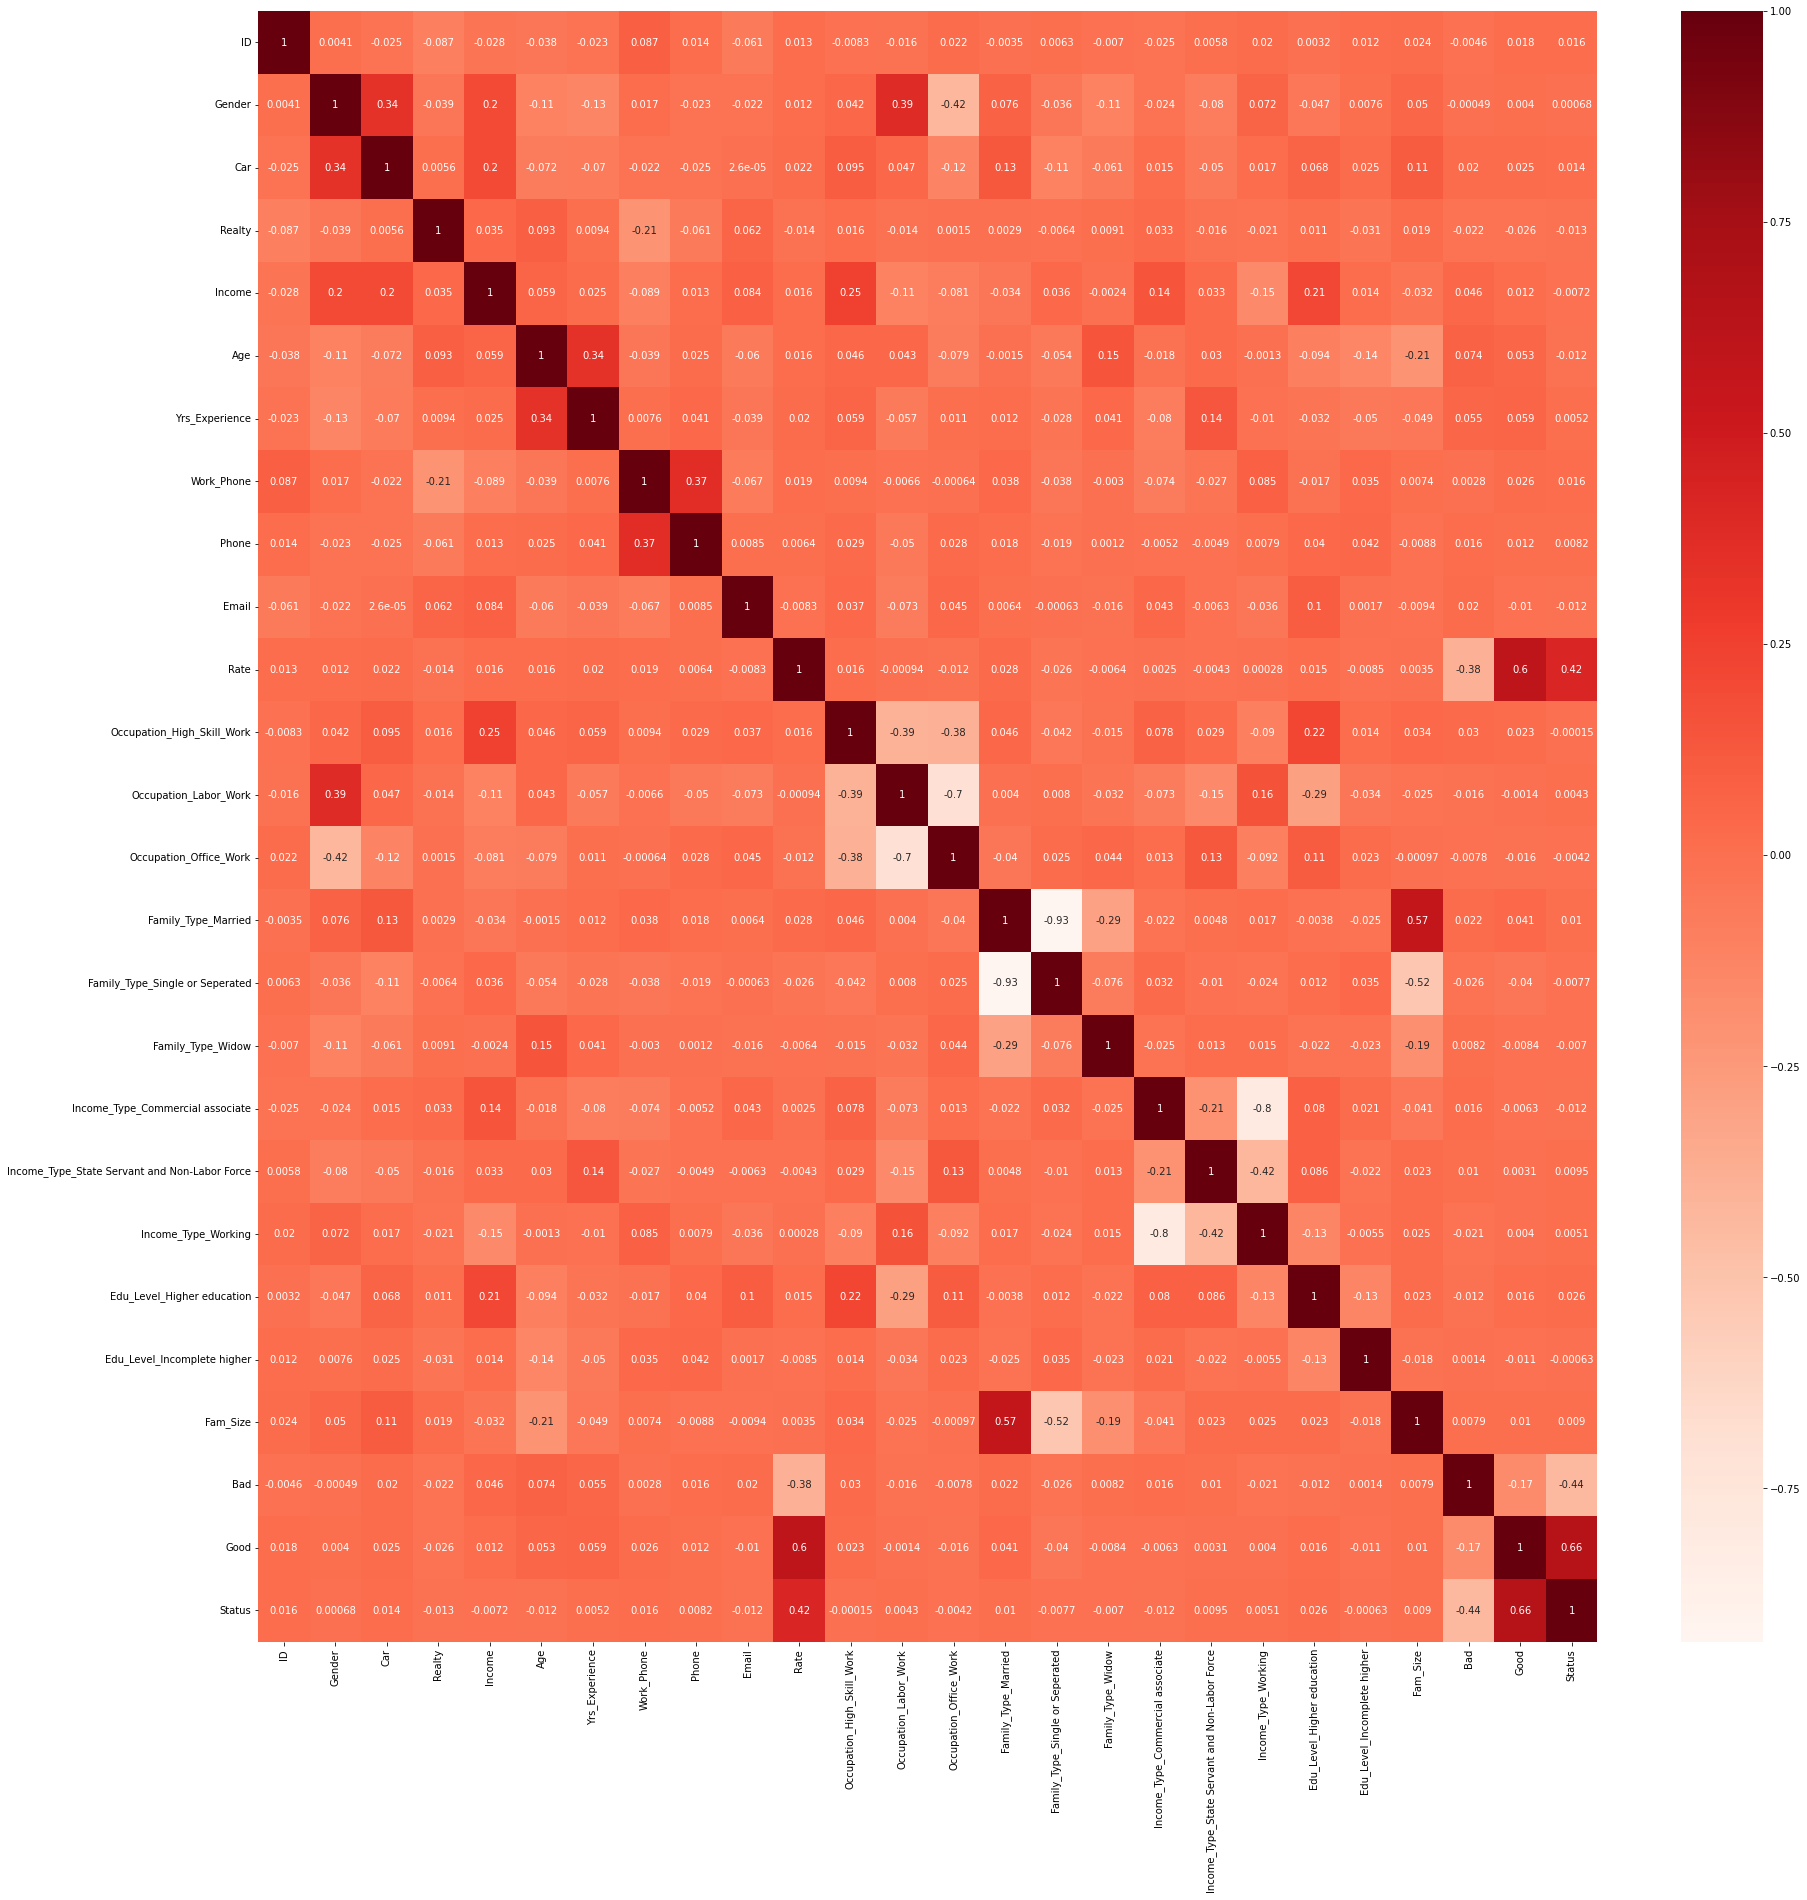

In [78]:
#plot correlation heatmap for the dataset

corr = whole_data2.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap="Reds", annot=True)

The above are attempts to find correlation between each columns within the dataset. There are two conclusions: 1.The individual correlations of demographic features with ‘Rate’ is quite bad. 2. Any correlations in the heat map that are noteworthy are all quite intuitive, i.e. higher education is positively correlated with high income, married is positively correlated with more family members. 

## Train and Select Model

In [79]:
#create the data for training

ml_data1 = whole_data2 
ml_data1.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'Income', 'Age', 'Yrs_Experience',
       'Work_Phone', 'Phone', 'Email', 'Rate', 'Occupation_High_Skill_Work',
       'Occupation_Labor_Work', 'Occupation_Office_Work',
       'Family_Type_Married', 'Family_Type_Single or Seperated',
       'Family_Type_Widow', 'Income_Type_Commercial associate',
       'Income_Type_State Servant and Non-Labor Force', 'Income_Type_Working',
       'Edu_Level_Higher education', 'Edu_Level_Incomplete higher', 'Fam_Size',
       'Bad', 'Good', 'Status'],
      dtype='object')

In [80]:
#seperate dependant and independent variables

X = ml_data1.drop(['ID','Bad','Good','Rate','Status'], axis=1)
Y = ml_data1.Status
X
Y

,Gender,Car,Realty,Income,Age,Yrs_Experience,Work_Phone,Phone,Email,Occupation_High_Skill_Work,...,Occupation_Office_Work,Family_Type_Married,Family_Type_Single or Seperated,Family_Type_Widow,Income_Type_Commercial associate,Income_Type_State Servant and Non-Labor Force,Income_Type_Working,Edu_Level_Higher education,Edu_Level_Incomplete higher,Fam_Size
1,1,1,1,112500.0,59.0,3.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2.0
2,0,0,1,270000.0,52.0,8.0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1.0
3,0,0,1,270000.0,52.0,8.0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1.0
4,0,0,1,270000.0,52.0,8.0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1.0
5,0,0,1,270000.0,52.0,8.0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24839,1,1,1,315000.0,48.0,7.0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,2.0
24840,0,0,1,157500.0,34.0,4.0,0,1,1,0,...,1,1,0,0,1,0,0,1,0,2.0
24841,0,0,1,157500.0,34.0,4.0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,2.0
24842,0,0,1,283500.0,49.0,2.0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,2.0


1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
24839    1.0
24840    0.0
24841    0.0
24842    0.0
24843    0.0
Name: Status, Length: 24843, dtype: float64

### Split Train Test Set and Scaling the Inputs

In [81]:
#train, test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 128)
len((X_train))
len((X_test))

19874

4969

In [82]:
#scaling the varible

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

A new dataset was created for the training and testing part. Afterwards, the dependent varibles and the indepedent variables are splitted into two ways. 

Training and test sets are also splitted in this step, however, I understand the more conventional or safe way is to split it up in the very beginning becasue we want to avoid any possiblities of mitigating the value of the results.

Last thing was done at this stage was scaling the independent values. Since most of the dataset is composed of 1s and 0s, and some other values are in hundreds of thousands.

### Logistic Regression

In [111]:
#training the log model using default hyperparameters
model = LogisticRegression()
model.fit(X_train, y_train)

#test it on the test set
y_predict = model.predict(X_test)

#return the accuracy and f1 score
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

LogisticRegression()

Accuracy Score is 0.55886
F1 Score is 0.71443


In [172]:
#creating a confusion matrix for the model

y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[4944, 4041],
       [3281, 7608]])

#### Grid Search for Logistic Regression

In [84]:
#defining the parameters for the grid search 

logModel = LogisticRegression()
param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }]

In [85]:
#define the grid search

clf = GridSearchCV(logModel, param_grid = param_grid, scoring = "f1", cv = 3, verbose=True, n_jobs=-1)

In [86]:
#perform the grid search

best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/Users/songderi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/songderi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/songderi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/songderi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/songderi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/songderi/opt/anaconda3/lib/p

In [87]:
#finding the best hyperparamters combinations from grid search

best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='saga')

In [89]:
#fit the model and test it with the best hyperparameters

model = LogisticRegression(C=0.0001, penalty='l1', solver='saga')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

LogisticRegression(C=0.0001, penalty='l1', solver='saga')

Accuracy Score is 0.56108
F1 Score is 0.71883


2 performance measurement methods have been used in this project: accuracy and f1 score. Accuracy is intuitive and easy to interpret, f1 score works better when the data is imbalanced, and takes account of the distribution of data which is why I thought they work somewhat complementary and used both.

The first model is logistic regression because it is a good algorithm for binary classification task like this. Although it showed the best result for f1 score out of 3 models, the accuracy is pretty low. 

### Decision Tree

In [107]:
#training the decision tree model using default hyperparameters
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#test it on the test set
y_predict = model.predict(X_test)

#return the accuracy and f1 score
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

DecisionTreeClassifier()

Accuracy Score is 0.65164
F1 Score is 0.6795


In [108]:
#creating a confusion matrix for the model

y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[5679, 3306],
       [4086, 6803]])

In [116]:
#defining the parameters for the grid search 
dtModel = DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[45,50,52,53,53,55,60,70],
             'min_samples_leaf':[1,2,3,4,5],
             'max_features':[1,2,3]
             }

#define the grid search
clf = GridSearchCV(dtModel, param_grid = tree_para, scoring='f1', cv=5, verbose=2)

In [117]:
#perform the grid search
best_clf = clf.fit(X_train,y_train)

#finding the best hyperparamters combinations from grid search
best_clf.best_estimator_

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=2, min

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=2,
                       min_samples_leaf=3, splitter='random')

In [153]:
#fit the model and test it with the best hyperparameters

model = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=2,
                       min_samples_leaf=3, splitter='random')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=2,
                       min_samples_leaf=3, splitter='random')

Accuracy Score is 0.56551
F1 Score is 0.69621


In [180]:
#fit the model and test it with the best hyperparameters

model = DecisionTreeClassifier(criterion='gini', max_depth=53, max_features=1,
                       min_samples_leaf=1, splitter='best')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

DecisionTreeClassifier(max_depth=53, max_features=1)

Accuracy Score is 0.65426
F1 Score is 0.68007


In [187]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

RandomForestClassifier()

Accuracy Score is 0.6613
F1 Score is 0.70561


### Random Forest


In [190]:
#training the random forest model using default hyperparameters
model = RandomForestClassifier()
model.fit(X_train, y_train)

#test it on the test set
y_predict = model.predict(X_test)

#return the accuracy and f1 score
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

RandomForestClassifier()

Accuracy Score is 0.6619
F1 Score is 0.70588


In [168]:
#creating a confusion matrix for the model

y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[4944, 4041],
       [3281, 7608]])

In [160]:
# Number of trees in random forest
n_estimators = [70,72,75,78,80,85]
# Number of features to consider at every split
max_features = [1,2,3]
# Maximum number of levels in tree
max_depth = [1,2,3]
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [161]:
#defining the parameters for the grid search

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [162]:
#define the model and the grid search

rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, scoring = "f1", cv = 3, verbose=2, n_jobs = 4)

In [163]:
#perform the grid search

rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [70, 72, 75, 78, 80, 85]},
             scoring='f1', verbose=2)

In [164]:
#finding the best hyperparamters combinations from grid search

rf_Grid.best_estimator_

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=75)

In [188]:
#fit the model and test it with the best hyperparameters

rf_Model = RandomForestClassifier(bootstrap = False,
 max_depth = 2,
 max_features = 3,
 min_samples_leaf = 2,
 min_samples_split = 2,
 n_estimators = 72)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

RandomForestClassifier()

Accuracy Score is 0.6615
F1 Score is 0.70241


In [189]:
#fit the model and test it with the best hyperparameters

rf_Model = RandomForestClassifier(max_depth=3, max_features=3, n_estimators=75)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

RandomForestClassifier()

Accuracy Score is 0.6611
F1 Score is 0.70672


I used both decision tree and random forest classifiers for the task because I would like to compare how much better the random forest could outperform decision tree. Unfortunately, in this particular task no much. 

Although both of the models have a lower f1 score than the logistic model, they are much more consistant: the accuracy score is only lower than the f1 score by a little, unlike logistic model, which is why I think the latter two are more robust models.

However there is one thing I failed to achieve in this project. I looked up the meaning of the hyperparameters and tried different combinations for the grid search task (why I have models with 2 different sets of hyperparameters), but still could not get the models to improve by a significant amount. I am not sure whether it is just a difficult task or I overlooked some parts.

## Conclusion

All three models gave us a performance rate around 65-70% which is far from good for a task as important as default possibilities prediction. It could potentially cause banks a huge loss.

The reason that caused this low rate, in my opinion, is failing to put in the most important explanatory variable which is previous credit histories. Instead, it has been used as the target variable.The better way I would purpose is to include previous credit histories as part of the dependent variables and use whether or not they actually defaulted as target variable.

Word Count: 1992

## Reference

Some codes in the project is from the project from this link: https://www.kaggle.com/rikdifos/credit-card-approval-prediction-using-ml